In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

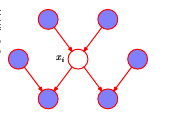

Fig.26 The Markov blanket of a node $x_i$ comprises the set of parents, children and co-parents of the node. It has the property that the conditional distribution of $x_i$ , conditioned on all the remaining variables in the graph, is dependent only on the variables in the Markov blanket.

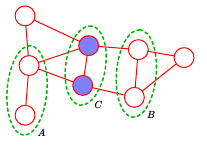

Fig.27 An example of an undirected graph in which every path from any node in set A to any node in set B passes through at least one node in set C. Consequently the conditional independence property $A ⊥ ⊥ B | C$ holds for any probability distribution described by this graph.

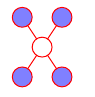

Fig.28 For an undirected graph, the Markov blanket of a node xi consists of the set of neighbouring nodes. It has the property that the conditional distribution of xi , conditioned on all the remaining variables in the graph, is dependent only on the variables in the Markov blanket.

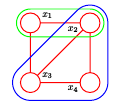

Fig.29 A four-node undirected graph showing a clique (outlined in green) and a maximal clique (outlined in blue).

##  Markov Random Fields

## Introduction

Markov Random Fields (MRFs), also known as **Markov Networks** or **Undirected Graphical Models**, describe the relationships between variables using **undirected graphs**. These models provide:
1. A **factorization** of the joint distribution.
2. A set of **conditional independence properties**.

### Key Characteristics:
- **Nodes**: Represent variables or groups of variables.
- **Edges**: Represent relationships between variables. These are undirected, removing the asymmetry of parent and child nodes in directed models.

---

## Conditional Independence Properties

In MRFs, conditional independence is tested using **graph separation**, which simplifies the process compared to directed models that require **d-separation**.

### Conditional Independence Test
Given three disjoint sets of nodes $ A, B, \text{ and } C $, we want to test:
$$
A \perp\!\!\!\perp B \mid C.
$$
To determine this:
1. Consider all paths between nodes in $ A $ and $ B $.
2. If every path passes through at least one node in $ C $, the conditional independence $ A \perp\!\!\!\perp B \mid C $ holds.

#### Alternative View:
- Remove all nodes in $ C $ and their connected edges.
- If no path connects $ A $ to $ B $ in the modified graph, $ A \perp\!\!\!\perp B \mid C $.

### Markov Blanket
In undirected graphs, the **Markov blanket** of a node $ x_i $ consists of its immediate neighbors. A node $ x_i $ is conditionally independent of all other nodes given its Markov blanket:
$$
p(x_i \mid x_{\backslash i}) = p(x_i \mid \text{Markov Blanket}(x_i)).
$$

---

##  Factorization Properties

MRFs decompose the joint distribution into products of functions over subsets of variables associated with **cliques**.

### Definition of a Clique
- A **clique** is a subset of nodes in a graph that are fully connected.
- A **maximal clique** is a clique that cannot be extended by adding any more nodes without losing the fully connected property.

#### Example:
For a graph with four nodes:

- **Cliques**: $ \{x_1, x_2\}, \{x_2, x_3\}, \{x_3, x_4\} $.
- **Maximal Cliques**: $ \{x_1, x_2, x_3\}, \{x_2, x_3, x_4\} $.

### Factorization of Joint Distribution
The joint distribution $ p(x) $ is expressed as:
$$
p(x) = \frac{1}{Z} \prod_{C \in \text{maximal cliques}} \psi_C(x_C),
$$
where:
- $ \psi_C(x_C) $: Potential functions defined over the maximal cliques $ C $.
- $ Z $: The **partition function**, ensuring normalization:
$$
Z = \sum_{x} \prod_{C} \psi_C(x_C).
$$

### Conditional Independence and Factorization
If $ p(x) > 0 $, the **Hammersley-Clifford Theorem** guarantees that:
1. The conditional independencies in the graph match those implied by the factorization.
2. Potential functions are strictly positive:
$$
\psi_C(x_C) = \exp(-E(x_C)),
$$
where $ E(x_C) $ is the **energy function**.

---

## Key Differences from Directed Graphical Models

1. **Normalization**:
   - Directed graphs are normalized automatically by conditional probabilities.
   - Undirected graphs require explicit normalization with the partition function $ Z $.

2. **Potential Functions**:
   - In directed graphs, factors are conditional probabilities.
   - In undirected graphs, potential functions provide greater flexibility but lack a probabilistic interpretation.

3. **Inference**:
   - Computing $ Z $ can be computationally expensive for large models.
   - Marginal probabilities and local conditionals can be computed without $ Z $ for small subsets of variables.

---

## Summary

Markov Random Fields:
- Simplify conditional independence testing with graph separation.
- Factorize the joint distribution using maximal cliques.
- Require an explicit partition function for normalization.

---



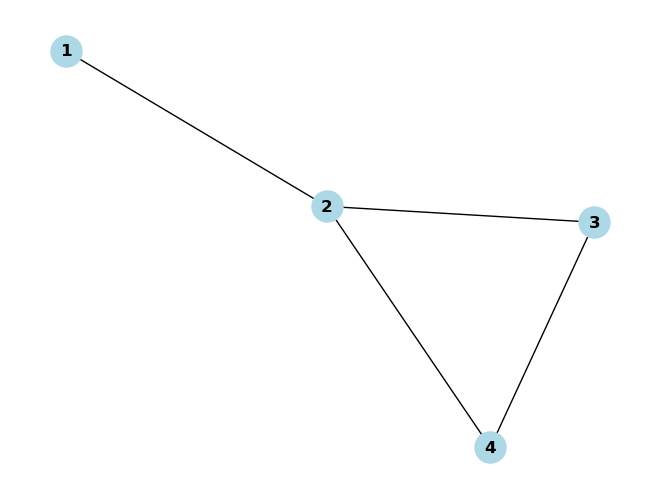

Marginal Probability of node 2 being in state 1: 0.5000


In [1]:
# Import required libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product

# Step 1: Create the undirected graph
def create_undirected_graph(edges):
    """
    Create an undirected graph with specified edges.
    
    Args:
        edges (list of tuples): List of edges as pairs of nodes.
    
    Returns:
        G (networkx.Graph): The undirected graph.
    """
    G = nx.Graph()
    G.add_edges_from(edges)
    return G

# Step 2: Define potential functions for cliques
def define_potentials():
    """
    Define potential functions for the cliques of the MRF.
    
    Returns:
        potentials (dict): A dictionary mapping cliques to potential functions.
    """
    potentials = {
        (1, 2): lambda x1, x2: np.exp(-(x1 - x2)**2),
        (2, 3): lambda x2, x3: np.exp(-(x2 - x3)**2),
        (3, 4): lambda x3, x4: np.exp(-(x3 - x4)**2),
        (2, 4): lambda x2, x4: np.exp(-(x2 - x4)**2)
    }
    return potentials

# Step 3: Compute the joint probability
def compute_joint_probability(G, potentials, state):
    """
    Compute the joint probability of a given state based on the potential functions.
    
    Args:
        G (networkx.Graph): The undirected graph.
        potentials (dict): Potential functions for the cliques.
        state (dict): A dictionary mapping nodes to their states.
    
    Returns:
        joint_prob (float): The computed joint probability.
    """
    joint_prob = 1.0
    for clique, potential in potentials.items():
        values = [state[node] for node in clique]
        joint_prob *= potential(*values)
    return joint_prob

# Step 4: Perform inference (marginal probability calculation)
def marginal_probability(G, potentials, target_node, target_state, all_states):
    """
    Compute the marginal probability of a node being in a specific state.
    
    Args:
        G (networkx.Graph): The undirected graph.
        potentials (dict): Potential functions for the cliques.
        target_node (int): The node of interest.
        target_state (int): The state of the target node.
        all_states (list): All possible states for each node.
    
    Returns:
        marginal_prob (float): The marginal probability of the target state.
    """
    nodes = list(G.nodes)
    joint_probs = []
    
    # Iterate over all possible states for other nodes
    for full_state in product(all_states, repeat=len(nodes)):
        state = dict(zip(nodes, full_state))
        if state[target_node] == target_state:
            joint_probs.append(compute_joint_probability(G, potentials, state))
    
    # Normalize the probabilities
    marginal_prob = sum(joint_probs)
    normalization_constant = sum(
        compute_joint_probability(G, potentials, dict(zip(nodes, full_state)))
        for full_state in product(all_states, repeat=len(nodes))
    )
    return marginal_prob / normalization_constant

# Step 5: Visualization (optional)
def visualize_graph(G):
    """
    Visualize the undirected graph.
    
    Args:
        G (networkx.Graph): The undirected graph.
    """
    nx.draw(G, with_labels=True, node_color="lightblue", font_weight="bold", node_size=500)
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Define the edges and graph
    edges = [(1, 2), (2, 3), (3, 4), (2, 4)]
    G = create_undirected_graph(edges)
    visualize_graph(G)
    
    # Define potential functions
    potentials = define_potentials()
    
    # Define the states (binary states: 0 or 1)
    all_states = [0, 1]
    
    # Compute marginal probability for node 2 being in state 1
    target_node = 2
    target_state = 1
    marginal_prob = marginal_probability(G, potentials, target_node, target_state, all_states)
    print(f"Marginal Probability of node {target_node} being in state {target_state}: {marginal_prob:.4f}")


## Image De-noising using Markov Random Fields

Image de-noising is a classical application of **Markov Random Fields (MRF)**, where we aim to recover a noise-free binary image from a noisy observation. This process utilizes the statistical correlation between neighboring pixels in the image and the observed noisy values.

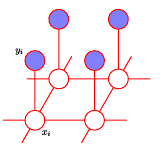

Fig.31 An undirected graphical model representing a Markov random ﬁeld for image de-noising, in which $x_i$ is a binary variable denoting the state of pixel i in the unknown noise-free image, and $y_i$ denotes the corresponding value of pixel i in the observed noisy image.

---

### Problem Formulation

Let the noisy image be represented by $ y_i \in \{-1, +1\} $, where $ i = 1, \dots, D $ indexes the pixels. The unknown noise-free image is represented as $ x_i \in \{-1, +1\} $. The noise model flips the sign of $ x_i $ with a small probability.

Our goal is to recover $ \mathbf{x} = \{x_1, x_2, \dots, x_D\} $ given $ \mathbf{y} = \{y_1, y_2, \dots, y_D\} $. We assume the following:
- $ x_i $ and $ y_i $ are strongly correlated.
- Neighboring pixels $ x_i $ and $ x_j $ in the noise-free image are strongly correlated.

---

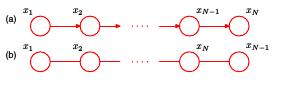

Fig.32 (a) Example of a directed graph. (b) The equivalent undirected graph.

### Energy Function

The MRF is defined using the following **energy function**:

$$
E(\mathbf{x}, \mathbf{y}) = \sum_{i} h x_i - \sum_{\{i, j\}} \beta x_i x_j - \sum_{i} \eta x_i y_i,
$$

where:
- $ h $: A bias term, which is set to $ h = 0 $ for simplicity.
- $ \beta $: Correlation strength between neighboring pixels $ x_i $ and $ x_j $.
- $ \eta $: Correlation strength between $ x_i $ and $ y_i $.

The joint probability of $ \mathbf{x} $ and $ \mathbf{y} $ is given by:

$$
p(\mathbf{x}, \mathbf{y}) = \frac{1}{Z} \exp(-E(\mathbf{x}, \mathbf{y})),
$$

where $ Z $ is the normalization constant (partition function).

---

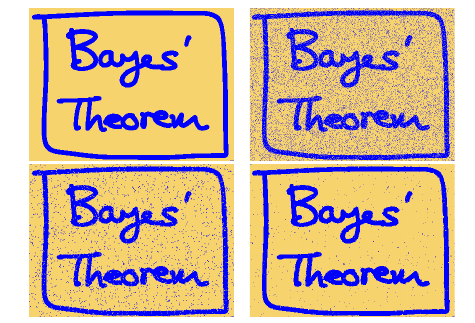

Fig.30 Illustration of image de-noising using a Markov random ﬁeld. The top row shows the original binary image on the left and the corrupted image after randomly changing 10% of the pixels on the right. The bottom row shows the restored images obtained using iterated conditional models (ICM) on the left and using the graph-cut algorithm on the right. ICM produces an image where 96% of the pixels agree with the original image, whereas the corresponding number for graph-cut is 99%.

### Iterated Conditional Modes (ICM) Algorithm

We use the **ICM algorithm** to find the most probable noise-free image $ \mathbf{x} $:
1. Initialize $ x_i = y_i $ for all $ i $.
2. For each pixel $ j $, compute the total energy for $ x_j = +1 $ and $ x_j = -1 $, keeping all other variables fixed.
3. Update $ x_j $ to the value that minimizes the energy.
4. Repeat for all pixels until convergence.

---

### Implementation in Python

```python
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the energy function
def energy(x, y, beta, eta):
    """
    Compute the energy of the configuration x given y.
    Args:
        x: Binary image (noise-free configuration).
        y: Observed noisy image.
        beta: Correlation strength between neighboring pixels.
        eta: Correlation strength between x_i and y_i.
    Returns:
        Total energy of the configuration x.
    """
    h = 0  # Bias term
    D = x.shape
    E = h * np.sum(x)  # Bias term contribution
    
    # Add pairwise energy term for neighbors
    for i in range(D[0]):
        for j in range(D[1]):
            if i > 0:  # Neighbor above
                E -= beta * x[i, j] * x[i - 1, j]
            if j > 0:  # Neighbor to the left
                E -= beta * x[i, j] * x[i, j - 1]
    
    # Add data energy term for observed values
    E -= eta * np.sum(x * y)
    
    return E

# Step 2: Iterated Conditional Modes (ICM) algorithm
def icm(y, beta, eta):
    """
    Perform image de-noising using the ICM algorithm.
    Args:
        y: Observed noisy image.
        beta: Correlation strength between neighboring pixels.
        eta: Correlation strength between x_i and y_i.
    Returns:
        Denoised image.
    """
    x = y.copy()  # Initialize x to the observed image
    D = x.shape
    converged = False
    
    while not converged:
        changes = 0
        for i in range(D[0]):
            for j in range(D[1]):
                # Compute energy for x[i, j] = +1 and x[i, j] = -1
                x[i, j] = 1
                E_plus = energy(x, y, beta, eta)
                x[i, j] = -1
                E_minus = energy(x, y, beta, eta)
                
                # Choose the state that minimizes the energy
                x[i, j] = 1 if E_plus < E_minus else -1
                changes += int(E_plus != E_minus)
        
        if changes == 0:
            converged = True
    
    return x

# Step 3: Generate noisy image
np.random.seed(0)
original_image = np.random.choice([-1, 1], size=(10, 10))
noise = np.random.choice([-1, 1], size=(10, 10), p=[0.9, 0.1])
noisy_image = original_image * noise

# Step 4: Apply ICM for de-noising
beta = 1.0
eta = 2.1
denoised_image = icm(noisy_image, beta, eta)

# Step 5: Display results
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(original_image, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(noisy_image, cmap="gray")
ax[1].set_title("Noisy Image")
ax[2].imshow(denoised_image, cmap="gray")
ax[2].set_title("Denoised Image")
plt.show()


In [ ]:
"""
Image De-noising using Markov Random Fields

This script demonstrates image de-noising using a Markov Random Field (MRF) and the 
Iterated Conditional Modes (ICM) algorithm. The goal is to recover a noise-free 
binary image from a noisy observation.

MRF Formulation:
- Noisy image: y_i ∈ {-1, +1}, where i indexes the pixels.
- Noise-free image: x_i ∈ {-1, +1}.
- Energy function: 
    E(x, y) = h Σ x_i - β Σ x_i x_j - η Σ x_i y_i,
    where:
        - h: Bias term (set to 0 for simplicity).
        - β: Correlation strength between neighboring pixels.
        - η: Correlation strength between x_i and y_i.

Algorithm:
1. Initialize x_i = y_i for all i.
2. For each pixel, compute the energy for x_j = +1 and x_j = -1 and update x_j.
3. Repeat until convergence.

"""

import numpy as np
import matplotlib.pyplot as plt

def energy(x, y, beta, eta):
    """
    Compute the energy of the configuration x given y.
    Args:
        x: Binary image (noise-free configuration).
        y: Observed noisy image.
        beta: Correlation strength between neighboring pixels.
        eta: Correlation strength between x_i and y_i.
    Returns:
        Total energy of the configuration x.
    """
    h = 0  # Bias term
    D = x.shape
    E = h * np.sum(x)  # Bias term contribution
    
    # Add pairwise energy term for neighbors
    for i in range(D[0]):
        for j in range(D[1]):
            if i > 0:  # Neighbor above
                E -= beta * x[i, j] * x[i - 1, j]
            if j > 0:  # Neighbor to the left
                E -= beta * x[i, j] * x[i, j - 1]
    
    # Add data energy term for observed values
    E -= eta * np.sum(x * y)
    
    return E

def icm(y, beta, eta):
    """
    Perform image de-noising using the ICM algorithm.
    Args:
        y: Observed noisy image.
        beta: Correlation strength between neighboring pixels.
        eta: Correlation strength between x_i and y_i.
    Returns:
        Denoised image.
    """
    x = y.copy()  # Initialize x to the observed image
    D = x.shape
    converged = False
    
    while not converged:
        changes = 0
        for i in range(D[0]):
            for j in range(D[1]):
                # Compute energy for x[i, j] = +1 and x[i, j] = -1
                x[i, j] = 1
                E_plus = energy(x, y, beta, eta)
                x[i, j] = -1
                E_minus = energy(x, y, beta, eta)
                
                # Choose the state that minimizes the energy
                x[i, j] = 1 if E_plus < E_minus else -1
                changes += int(E_plus != E_minus)
        
        if changes == 0:
            converged = True
    
    return x

# Generate a noisy image
np.random.seed(0)
original_image = np.random.choice([-1, 1], size=(10, 10))
noise = np.random.choice([-1, 1], size=(10, 10), p=[0.9, 0.1])
noisy_image = original_image * noise

# Apply ICM for de-noising
beta = 1.0
eta = 2.1
denoised_image = icm(noisy_image, beta, eta)

# Display results
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(original_image, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(noisy_image, cmap="gray")
ax[1].set_title("Noisy Image")
ax[2].imshow(denoised_image, cmap="gray")
ax[2].set_title("Denoised Image")
plt.show()


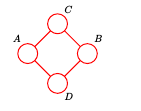

## Relation to Directed Graphs

We have introduced two graphical frameworks for representing probability distributions: directed and undirected graphs. In this section, we discuss the relationship between them.

## Converting Directed Graphs to Undirected Graphs

Consider the problem of converting a directed graph into an undirected graph. In some cases, this is straightforward. For instance, the joint distribution for the directed graph in Figure 8.32 is:

$$
p(x) = p(x_1)p(x_2 \mid x_1)p(x_3 \mid x_2) \cdots p(x_N \mid x_{N-1}). \tag{8.44}
$$

For the corresponding undirected graph, the joint distribution can be expressed as:

$$
p(x) = \frac{1}{Z} \psi_{1,2}(x_1, x_2) \psi_{2,3}(x_2, x_3) \cdots \psi_{N-1, N}(x_{N-1}, x_N). \tag{8.45}
$$

where the clique potentials are defined as:

$$
\psi_{1,2}(x_1, x_2) = p(x_1)p(x_2 \mid x_1), \\
\psi_{2,3}(x_2, x_3) = p(x_3 \mid x_2), \\
\cdots, \\
\psi_{N-1,N}(x_{N-1}, x_N) = p(x_N \mid x_{N-1}).
$$

In this case, the partition function $ Z = 1 $.

### Moralization

When nodes in the directed graph have multiple parents, a process called **moralization** is used to create an undirected graph. For instance, consider the directed graph in Fig.33(a). The joint distribution is:

$$
p(x) = p(x_1)p(x_2)p(x_3)p(x_4 \mid x_1, x_2, x_3). \tag{8.46}
$$

To incorporate the factor $ p(x_4 \mid x_1, x_2, x_3) $, we add undirected links between all parents of $x_4 $, "marrying" them. The resulting graph is called a **moral graph** and is shown in Fig.33(b).

#### Steps to Moralize a Directed Graph:
1. Add undirected links between all parents of each node.
2. Drop the directed arrows from the graph.
3. Initialize all clique potentials of the moral graph to 1.
4. Multiply each conditional distribution factor from the directed graph into one of the clique potentials.

In all cases, the partition function $ Z = 1 $.

### Observations:
- Moralization discards some conditional independence properties.
- The moral graph is fully connected if the original directed graph has a "head-to-head" node structure.

## Limitations of Conversion

### Directed Graph to Undirected Graph

Converting a directed graph to an undirected graph may result in the loss of some conditional independence properties. For example, the directed graph in Figure 8.35 encodes:

$$
A \perp\!\!\!\perp B \mid \emptyset \quad \text{and} \quad A \perp\!\!\!\perp B \mid C.
$$

However, no undirected graph over the same three variables can encode these properties as a perfect map.

### Undirected Graph to Directed Graph

Converting an undirected graph to a directed graph also poses challenges. For example, the undirected graph in Figure 8.36 represents the conditional independence properties:

$$
A \perp\!\!\!\perp B \mid \emptyset, \\
C \perp\!\!\!\perp D \mid A \cup B, \\
A \perp\!\!\!\perp B \mid C \cup D.
$$

No directed graph over the same variables can encode these properties.

## Perfect Maps

A graph is said to be a **D-map** (dependency map) of a distribution if every conditional independence statement satisfied by the distribution is reflected in the graph. Conversely, a graph is an **I-map** (independence map) if every conditional independence statement implied by the graph is satisfied by the distribution.

If a graph satisfies both conditions, it is called a **perfect map**.

### Venn Diagram of Distributions

The relationship between distributions and their perfect maps is illustrated in Fig.34:

- $ D $: Distributions with a directed perfect map.
- $ U $: Distributions with an undirected perfect map.
- $ P $: Set of all distributions.

Some distributions cannot be represented perfectly using either directed or undirected graphs.

## Chain Graphs

To address limitations of directed and undirected graphs, **chain graphs** are introduced. These graphs combine directed and undirected edges to represent a broader class of distributions. However, even chain graphs cannot represent every distribution perfectly.

---



In [ ]:
# Required Libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to create a directed graph
def create_directed_graph():
    G = nx.DiGraph()
    # Add edges representing the directed graph
    edges = [("X1", "X4"), ("X2", "X4"), ("X3", "X4")]
    G.add_edges_from(edges)
    return G

# Function to moralize a directed graph
def moralize_directed_graph(G):
    moral_graph = nx.Graph()
    moral_graph.add_edges_from(G.edges())
    
    # Find all parents of each node
    for node in G.nodes():
        parents = list(G.predecessors(node))
        if len(parents) > 1:
            # Add undirected edges between all pairs of parents
            for i in range(len(parents)):
                for j in range(i + 1, len(parents)):
                    moral_graph.add_edge(parents[i], parents[j])
    
    return moral_graph

# Function to visualize graphs
def plot_graph(G, title, pos=None):
    plt.figure(figsize=(8, 6))
    pos = pos or nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12)
    plt.title(title, fontsize=16)
    plt.show()

# Create a directed graph
directed_graph = create_directed_graph()
plot_graph(directed_graph, "Directed Graph")

# Moralize the directed graph
moral_graph = moralize_directed_graph(directed_graph)
plot_graph(moral_graph, "Moralized Graph")


In [ ]:
# Required Libraries
import networkx as nx
import matplotlib.pyplot as plt

# Function to create a directed graph
def create_directed_graph():
    """
    Create a directed graph with nodes and edges.
    """
    G = nx.DiGraph()
    edges = [("A", "C"), ("B", "C"), ("C", "D")]
    G.add_edges_from(edges)
    return G

# Function to moralize a directed graph
def moralize_directed_graph(G):
    """
    Moralize a directed graph by 'marrying' parents and converting directed edges to undirected edges.
    """
    moral_graph = nx.Graph()
    moral_graph.add_edges_from(G.edges())  # Convert existing edges to undirected
    
    # Marry the parents (add edges between all parents of each node)
    for node in G.nodes():
        parents = list(G.predecessors(node))
        for i in range(len(parents)):
            for j in range(i + 1, len(parents)):
                moral_graph.add_edge(parents[i], parents[j])
    return moral_graph

# Function to visualize a graph
def plot_graph(G, title):
    """
    Plot a graph using NetworkX.
    """
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Compute layout
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, edge_color='black')
    plt.title(title, fontsize=16)
    plt.show()

# Function to check conditional independence
def check_conditional_independence(graph, node1, node2, conditioned_on=None):
    """
    Check if two nodes are conditionally independent given a set of nodes.
    """
    conditioned_on = conditioned_on or []
    graph_copy = graph.copy()
    
    # Remove conditioned nodes from the graph
    for node in conditioned_on:
        if node in graph_copy:
            graph_copy.remove_node(node)
    
    # Check if node1 and node2 are disconnected in the modified graph
    return not nx.has_path(graph_copy, node1, node2)

# Main Execution
if __name__ == "__main__":
    # Create directed graph
    directed_graph = create_directed_graph()
    plot_graph(directed_graph, "Directed Graph")

    # Moralize the graph
    moral_graph = moralize_directed_graph(directed_graph)
    plot_graph(moral_graph, "Moralized Graph")

    # Conditional independence checks
    print("A ⟂ B | ∅:", check_conditional_independence(moral_graph, "A", "B"))
    print("A ⟂ B | C:", check_conditional_independence(moral_graph, "A", "B", ["C"]))


# Inference in Graphical Models

## 8.4 Inference in Graphical Models

We address the problem of inference in graphical models, where some nodes in the graph are clamped to observed values, and we aim to compute the posterior distributions of one or more subsets of other nodes. The graphical structure can help us design efficient algorithms and make the structure of these algorithms transparent.

Specifically, many algorithms can be expressed as **local message propagation** across the graph. In this section, we focus on techniques for **exact inference**, while Chapter 10 will explore approximate inference algorithms.

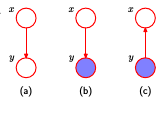

Fig.37 A graphical representation of Bayes’ theorem. See the text for details.

###  Bayes' Theorem in Graphical Models

Suppose we decompose the joint distribution $ p(x, y)$  over two variables $ x$  and $ y $ as:

$$
p(x, y) = p(x)p(y|x).
$$

This can be represented by the directed graph shown below:

- **(a)** Directed representation of $ p(x, y) $
- **(b)** Observing $ y $ (shaded node)
- **(c)** Joint distribution rewritten to $ p(y) $ and $ p(x|y) $

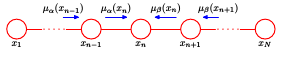

Fig.38 The marginal distribution $p(x_n )$ for a node xn along the chain is obtained by multiplying the two messages $µα (x_n )$ and $µβ (x_n )$, and then normalizing. These messages can themselves be evaluated recursively by passing messages from both ends of the chain towards node xn .

Using Bayes' theorem:

$$
p(x|y) = \frac{p(y|x)p(x)}{p(y)},
$$

where:

$$
p(y) = \sum_{x} p(y|x)p(x).
$$

From a graphical perspective, the direction of the arrow reverses after observing \( y \), as shown in Figure 8.37(c).

---

### 8.4.2 Inference on a Chain

Consider the chain of nodes in Figure 8.32, represented as an undirected graph. For simplicity, assume \( N \) nodes, each representing discrete variables with \( K \) states. The joint distribution is given by:

$$
p(x) = \frac{1}{Z} \prod_{n=1}^{N-1} \psi_{n, n+1}(x_n, x_{n+1}),
$$

where $ Z $ is the partition function.

#### Marginalization

To find the marginal $ p(x_n) $ for a specific node $ x_n $, sum over all variables except $ x_n $:

$$
p(x_n) = \sum_{x_1} \cdots \sum_{x_{n-1}} \sum_{x_{n+1}} \cdots \sum_{x_N} p(x).
$$

#### Naive Computation

In a naive implementation:

1. Compute $ p(x) $, which requires storing $ K^N $ values.
2. Perform explicit summation for $ p(x_n) $, leading to exponential complexity with $ N $.

#### Efficient Computation Using Conditional Independence

By exploiting the factorization $ p(x) = \prod_{n=1}^{N-1} \psi_{n, n+1}(x_n, x_{n+1}) $, rearrange summations and multiplications to marginalize efficiently:

1. Start with the summation over $ x_N $:

$$
\sum_{x_N} \psi_{N-1, N}(x_{N-1}, x_N),
$$

which results in a function of $ x_{N-1} $.

2. Continue summation over $ x_{N-1} $, using the result from the previous step with $ \psi_{N-2, N-1}(x_{N-2}, x_{N-1}) $.

3. Repeat until the desired marginal $ p(x_n) $ is obtained.

#### Graphical Interpretation

Each summation effectively removes a variable, corresponding to the removal of a node from the graph. The computation propagates along the chain, reducing the complexity from exponential to linear in $ N $.

---

### Summary

- **Graphical Models** simplify inference by leveraging factorization and conditional independence properties.
- **Message Passing Algorithms** (e.g., sum-product) are efficient for chain and tree-structured graphs.

In subsequent sections, we will extend these principles to more complex graphical models and explore approximate methods for inference in graphs with loops.


## Inference in Graphical Models

### Desired Marginal Expression

We are interested in the marginal distribution $  p(x_n) $ of a node $ x_n $ in a chain-structured graphical model. The expression for $ p(x_n) $ is:

$$
p(x_n) = \frac{1}{Z} \left[ \sum_{x_1, x_2, \dots, x_{n-1}} \psi_{1,2}(x_1, x_2) \cdots \psi_{n-1,n}(x_{n-1}, x_n) \right] \cdot \left[ \sum_{x_{n+1}, \dots, x_N} \psi_{n,n+1}(x_n, x_{n+1}) \cdots \psi_{N-1,N}(x_{N-1}, x_N) \right]
$$

Where $ Z $ is the normalization constant. The terms inside the sums represent the local potentials for the chain's connections between adjacent nodes. The notation for the summations is indicated as $ \sum_{x_1, x_2, \dots, x_{n-1}} $ and $ \sum_{x_{n+1}, \dots, x_N} $ to represent the summations over the relevant variables in the chain.

#### Concept of Distributivity

We use the distributive property of multiplication over addition to rearrange the summations:

$$
a(b + c) = ab + ac
$$

This allows us to combine and simplify the operations, reducing the computational cost.

### Computational Cost

The computational cost of evaluating the marginal $ p(x_n) $ is:

$$
O(NK^2)
$$

Where:
- $ N $ is the length of the chain,
- $ K $ is the number of states for each variable.

Each summation over $ x_1 $, $ x_2 $, etc., involves $ K \times K $ computations, leading to a total cost that scales linearly with the length of the chain, rather than exponentially.

### Message Passing Interpretation

We can interpret the calculation as a process of message passing. The marginal $ p(x_n) $ is computed by passing local messages forwards and backwards along the chain. The expression for $ p(x_n) $ becomes:

$$
p(x_n) = \mu_\alpha(x_n) \mu_\beta(x_n)
$$

Where $ \mu_\alpha(x_n) $ is a message passed forwards from node $ x_{n-1} $ to node $ x_n $, and $ \mu_\beta(x_n) $ is a message passed backwards from node $ x_{n+1} $ to node $ x_n $.

#### Forward Message

The forward message $ \mu_\alpha(x_n) $ can be computed recursively as:

$$
\mu_\alpha(x_n) = \sum_{x_{n-1}} \psi_{n-1,n}(x_{n-1}, x_n) \mu_\alpha(x_{n-1})
$$

Starting from the first node $ x_2 $, we compute:

$$
\mu_\alpha(x_2) = \sum_{x_1} \psi_{1,2}(x_1, x_2)
$$

This is applied recursively until we reach node $ x_n $.

#### Backward Message

Similarly, the backward message $ \mu_\beta(x_n) $ is computed recursively, starting from the last node $ x_N $, and moving backwards:

$$
\mu_\beta(x_n) = \sum_{x_{n+1}} \psi_{n+1,n}(x_{n+1}, x_n) \mu_\beta(x_{n+1})
$$

This continues until we reach node $ x_n $.

### Normalization Constant

The normalization constant $ Z $ is computed by summing over all possible states of $ x_n $:

$$
Z = \sum_{x_n} \mu_\alpha(x_n) \mu_\beta(x_n)
$$

This operation requires $ O(K) $ time, since there are $ K $ states for each variable.

### Markov Chains and Message Passing

The structure described here is an example of a **Markov chain**, and the recursive message passing equations are a representation of the **Chapman-Kolmogorov equations** for Markov processes (Papoulis, 1984).

## Evaluating Marginals for All Nodes in the Chain

### Computational Cost and Optimization

When we evaluate the marginal distribution $ p(x_n) $ for every node $ n \in \{1, 2, \dots, N\} $ in the chain, simply applying the procedure for each node individually would have a computational cost of $ O(N^2 K^2) $. This approach would be inefficient because it involves redundant computations. For example:
- To find $ p(x_1) $, we need to propagate a message $ \mu_\beta(\cdot) $ from node $ x_N $ back to node $ x_2 $.
- To evaluate $ p(x_2) $, we need to propagate messages $ \mu_\beta(\cdot) $ from node $ x_N $ back to node $ x_3 $.

These steps involve duplicated computation, as many of the messages are identical.

### Efficient Approach Using Message Propagation

To avoid this duplication, we can optimize the procedure by:
1. Launching a message $ \mu_\beta(x_{N-1}) $ from node $x_N $ and propagating corresponding messages back to node $ x_1 $.
2. Launching a message $ \mu_\alpha(x_2) $ from node $ x_1 $ and propagating messages forward to node $ x_N $.

By storing the intermediate messages, each node can then evaluate its marginal using the equation:

$$
p(x_n) = \mu_\alpha(x_n) \mu_\beta(x_n)
$$

The computational cost of this approach is only twice the cost of finding the marginal of a single node, rather than $ N $ times.

### Normalization Constant

The normalization constant $ Z $ is computed only once, using any convenient node, and does not need to be recomputed for each marginal.

### Clamping Observed Variables

If some nodes are observed, the corresponding variables are clamped to their observed values. This is done by multiplying the joint distribution by an additional function $ I(x_n, \hat{x}_n) $, which takes the value 1 when $ x_n = \hat{x}_n $ (the observed value) and 0 otherwise. This function is absorbed into the potentials that involve $ x_n $, and summations over $ x_n $ contain only the term where $ x_n = \hat{x}_n $.

### Joint Distribution for Two Neighboring Nodes

To calculate the joint distribution $ p(x_{n-1}, x_n) $ for two neighboring nodes, we can apply the following expression:

$$
p(x_{n-1}, x_n) = \frac{\mu_\alpha(x_{n-1}) \psi_{n-1,n}(x_{n-1}, x_n) \mu_\beta(x_n)}{Z}
$$

This result follows from the message passing approach and allows us to compute the joint distributions for the sets of variables in the potentials once we have obtained the marginals.

### Use in Parameter Learning

In practice, we may use parametric forms for the clique potentials (or equivalently for the conditional distributions in the case of a directed graph). In such cases, we can apply the **EM algorithm** to learn the parameters of these potentials. Specifically, the local joint distributions of the cliques, conditioned on any observed data, are used in the **E-step** of the EM algorithm.

We will explore some examples of this in detail in Chapter 13.



In [ ]:
import numpy as np

# Define the potentials as a list of functions
def potential(xn_minus_1, xn):
    """ Example potential function for a pair of nodes (xn-1, xn) """
    # In practice, this would be a more complex function, perhaps a table or a learned parameter
    return np.random.rand(len(xn_minus_1), len(xn))  # Random potential table (KxK)

# Message passing for the forward direction (from node 1 to node N)
def forward_message(potential_fn, prev_message, xn_minus_1_values):
    """ Calculate the forward message µα(xn) from node xn-1 to xn """
    message = np.dot(potential_fn(xn_minus_1_values, xn_values), prev_message)  # Forward message pass
    return message / np.sum(message)  # Normalize

# Message passing for the backward direction (from node N to node 1)
def backward_message(potential_fn, next_message, xn_values):
    """ Calculate the backward message µβ(xn) from node xn+1 to xn """
    message = np.dot(potential_fn(xn_values, xn_plus_1_values), next_message)  # Backward message pass
    return message / np.sum(message)  # Normalize

# Compute marginal for a node
def compute_marginal(node, forward_messages, backward_messages):
    """ Compute the marginal p(xn) as the product of forward and backward messages """
    return forward_messages[node] * backward_messages[node]

# Example graph setup for a simple chain of length N
N = 5  # Length of the chain (number of nodes)
K = 3  # Number of states per node
nodes = range(N)

# Initialize messages as empty arrays
forward_messages = [np.ones(K) for _ in nodes]  # Start with equal message for all states
backward_messages = [np.ones(K) for _ in nodes]  # Start with equal message for all states

# Potential functions (using random potential tables here as an example)
potentials = [lambda xn_minus_1, xn: potential(xn_minus_1, xn) for _ in range(N-1)]

# Forward pass - from node 1 to node N
for n in range(1, N):
    forward_messages[n] = forward_message(potentials[n-1], forward_messages[n-1], np.arange(K))

# Backward pass - from node N to node 1
for n in reversed(range(N-1)):
    backward_messages[n] = backward_message(potentials[n], backward_messages[n+1], np.arange(K))

# Now compute marginals for all nodes
marginals = [compute_marginal(node, forward_messages, backward_messages) for node in nodes]

# Print the marginal distributions for each node
for node in nodes:
    print(f"Marginal p(x{node}): {marginals[node]}")
